Implementation of deep learning techniques: GANs and autoencoders
Introduction
Imagine creating photorealistic images of people who don't exist, or generating lifelike audio of speeches never actually given. These are real applications of Generative Adversarial Networks, or GANs. And what if you could compress vast amounts of data while preserving its essential features? That's where Autoencoders come in. In this reading, we'll dive into these powerful AI techniques that are revolutionizing everything from art creation to data compression.

By the end of this reading, you’ll be able to:

explain how GANs and Autoencoders work.

implement basic models for GANs and Autoencoders.

train and evaluate GANs and Autoencoders for AI tasks.

Generative Adversarial Networks (GANs)
Let’s start with Generative Adversarial Networks, or GANs. A GAN consists of two components—a generator and a discriminator. The generator creates fake data, while the discriminator tries to distinguish between real and fake data. Over time, the generator gets better at fooling the discriminator.

GANs have been used to create deepfakes in video production, generate realistic images for fashion design, and even assist in drug discovery by generating molecular structures. For example, the fashion industry is using GANs to create virtual models and design new clothing styles, reducing the need for physical prototypes.

123456789101112131415161718
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the generator model
def build_generator():
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(100,)),
        layers.Dense(784, activation='sigmoid')  # Output: 28x28 flattened image
    ])
    return model


Here, the generator takes a random vector of size 100 and transforms it into a 28x28 image using fully connected layers. The discriminator, on the other hand, takes a flattened 28x28 image as input and outputs a probability of whether the image is real or fake.

Training the GAN
To train the GAN, we alternate between training the discriminator and the generator. The discriminator learns to classify real versus fake images, while the generator tries to create images that can fool the discriminator.

12345678910111213141516171819202122232425262728293031323334353637383940
import numpy as np
from tensorflow.keras.datasets import mnist

# Load and preprocess dataset (MNIST for example)
(X_train, _), (_, _) = mnist.load_data()

# Normalize images to [-1, 1] and flatten to (784,) for the discriminator input
X_train = (X_train.astype(np.float32) - 127.5) / 127.5  # Normalize to range [-1, 1]
X_train = X_train.reshape(-1, 784)  # Flatten 28x28 images to vectors of size 784



In this code, we train the discriminator on both real and fake images. Then, we train the generator to produce images that can fool the discriminator. The GAN is trained for 100 epochs, and we track the loss of both networks over time. For real-world applications, you’d want to train a GAN for well over 100 epochs.

Autoencoders
Now, let’s move on to Autoencoders. Autoencoders are a type of unsupervised learning model that compresses data into a lower-dimensional representation, known as the latent space, and then reconstructs it. They are commonly used for tasks like data denoising and dimensionality reduction.

Autoencoders have found applications in anomaly detection in manufacturing, where they can identify defective products by spotting deviations from the learned 'normal' representation. They're also used in recommendation systems to compress user preferences into a meaningful latent space.

1234567891011121314151617181920212223
# Define the encoder
def build_encoder():
    input_img = layers.Input(shape=(784,))
    encoded = layers.Dense(128, activation='relu')(input_img)
    encoded = layers.Dense(64, activation='relu')(encoded)
    return models.Model(input_img, encoded)

# Define the decoder
def build_decoder():
    encoded_input = layers.Input(shape=(64,))


The encoder compresses the input image to a 64-dimensional latent space, while the decoder reconstructs the original 784-dimensional image. This compressed latent space is key to the autoencoder’s ability to learn meaningful representations of data.

Training the Autoencoder
Training the autoencoder involves minimizing the difference between the original input and the reconstructed output.

12345
# Compile and train the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, validation_data=(X_test, X_test))

In this case, we use mean squared error (MSE) as the loss function since we want the output to be as close as possible to the original input. The model is trained for 50 epochs, and the performance is validated on a test set.

Conclusion
In this reading, we’ve implemented two powerful deep learning techniques—GANs and Autoencoders. GANs are used to generate new data, while Autoencoders help with data compression and reconstruction. Both of these models are critical in modern AI applications, from generating realistic images to reducing data dimensions.

Mastering these models not only enhances your ability to handle complex data challenges but also opens up opportunities in fields like image synthesis, data augmentation, and anomaly detection.  

Take the next step by experimenting with different datasets and tweaking these architectures to see how they perform. Start by choosing a dataset you're familiar with—perhaps images from your industry or text data from your field. Implement a basic GAN or Autoencoder on this dataset. Can you generate new, realistic data points or effectively compress and reconstruct your data? Remember, every experiment, successful or not, is a step towards mastering these powerful techniques.



In [1]:
#GAN

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the generator model
def build_generator():
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(100,)),
        layers.Dense(784, activation='sigmoid')  # Output: 28x28 flattened image
    ])
    return model

# Define the discriminator model
def build_discriminator():
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(784,)),  # Input: Flattened 28x28 image
        layers.Dense(1, activation='sigmoid')  # Output: Probability (real or fake)
    ])
    return model

Here, the generator takes a random vector of size 100 and transforms it into a 28x28 image using fully connected layers. The discriminator, on the other hand, takes a flattened 28x28 image as input and outputs a probability of whether the image is real or fake.

Training the GAN
To train the GAN, we alternate between training the discriminator and the generator. The discriminator learns to classify real versus fake images, while the generator tries to create images that can fool the discriminator.

In [3]:
import numpy as np
from tensorflow.keras.datasets import mnist

# Load and preprocess dataset (MNIST for example)
(X_train, _), (_, _) = mnist.load_data()

# Normalize images to [-1, 1] and flatten to (784,) for the discriminator input
X_train = (X_train.astype(np.float32) - 127.5) / 127.5  # Normalize to range [-1, 1]
X_train = X_train.reshape(-1, 784)  # Flatten 28x28 images to vectors of size 784

# Check the shape of the dataset
print(f"X_train shape: {X_train.shape}")  # Should print: (60000, 784)

# Build the models
generator = build_generator()
discriminator = build_discriminator()

# Compile the discriminator
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Create GAN model: stack generator and discriminator
gan = models.Sequential([generator, discriminator])
discriminator.trainable = False  # Freeze the discriminator when training the GAN

gan.compile(optimizer='adam', loss='binary_crossentropy')

# Training loop
epochs = 1000
batch_size = 32
half_batch = batch_size // 2

for epoch in range(epochs):
    # Train discriminator with real images
    idx = np.random.randint(0, X_train.shape[0], half_batch)  # Random real images
    real_imgs = X_train[idx]
    real_labels = np.ones((half_batch, 1))  # Real labels (1s)

    # Train discriminator with fake images
    noise = np.random.normal(0, 1, (half_batch, 100))  # Random noise input
    fake_imgs = generator.predict(noise)  # Fake images generated by the generator
    fake_labels = np.zeros((half_batch, 1))  # Fake labels (0s)

    # Train the discriminator on real and fake images
    d_loss_real = discriminator.train_on_batch(real_imgs, real_labels)
    d_loss_fake = discriminator.train_on_batch(fake_imgs, fake_labels)

    # Train the generator (the generator wants to fool the discriminator)
    noise = np.random.normal(0, 1, (batch_size, 100))  # Generate new noise
    gan_labels = np.ones((batch_size, 1))  # We want the generator to produce "real" images
    g_loss = gan.train_on_batch(noise, gan_labels)

    # Log progress every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Discriminator Loss: {d_loss_real[0]}, Generator Loss: {g_loss}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train shape: (60000, 784)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch 0, Discriminator Loss: 0.5498709678649902, Generator Loss: [array(1.1188128, dtype=float32), array(1.1188128, dtype=float32), array(0.375, dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━

In this code, we train the discriminator on both real and fake images. Then, we train the generator to produce images that can fool the discriminator. The GAN is trained for 100 epochs, and we track the loss of both networks over time. For real-world applications, you’d want to train a GAN for well over 100 epochs.

Autoencoders
Now, let’s move on to Autoencoders. Autoencoders are a type of unsupervised learning model that compresses data into a lower-dimensional representation, known as the latent space, and then reconstructs it. They are commonly used for tasks like data denoising and dimensionality reduction.

Autoencoders have found applications in anomaly detection in manufacturing, where they can identify defective products by spotting deviations from the learned 'normal' representation. They're also used in recommendation systems to compress user preferences into a meaningful latent space.

In [4]:
# Define the encoder
def build_encoder():
    input_img = layers.Input(shape=(784,))
    encoded = layers.Dense(128, activation='relu')(input_img)
    encoded = layers.Dense(64, activation='relu')(encoded)
    return models.Model(input_img, encoded)

# Define the decoder
def build_decoder():
    encoded_input = layers.Input(shape=(64,))
    decoded = layers.Dense(128, activation='relu')(encoded_input)
    decoded = layers.Dense(784, activation='sigmoid')(decoded)
    return models.Model(encoded_input, decoded)

# Build the full autoencoder
encoder = build_encoder()
decoder = build_decoder()

input_img = layers.Input(shape=(784,))
encoded_img = encoder(input_img)
decoded_img = decoder(encoded_img)

autoencoder = models.Model(input_img, decoded_img)

In [11]:
!pip install tensorflow

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np

# Define the generator model (for the GAN part)
def build_generator():
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(100,)),
        layers.Dense(784, activation='sigmoid')  # Output: 28x28 flattened image
    ])
    return model

# Define the discriminator model (for the GAN part)
def build_discriminator():
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(784,)),  # Input: Flattened 28x28 image
        layers.Dense(1, activation='sigmoid')  # Output: Probability (real or fake)
    ])
    return model

# Define the encoder model (for the autoencoder part)
def build_encoder():
    input_img = layers.Input(shape=(784,))
    encoded = layers.Dense(128, activation='relu')(input_img)
    encoded = layers.Dense(64, activation='relu')(encoded)
    return models.Model(input_img, encoded)

# Define the decoder model (for the autoencoder part)
def build_decoder():
    encoded_input = layers.Input(shape=(64,))
    decoded = layers.Dense(128, activation='relu')(encoded_input)
```python
!pip install tensorflow

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np

# Define the generator model (for the GAN part)
def build_generator():
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(100,)),
        layers.Dense(784, activation='sigmoid')  # Output: 28x28 flattened image
    ])
    return model

# Define the discriminator model (for the GAN part)
def build_discriminator():
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(784,)),  # Input: Flattened 28x28 image
        layers.Dense(1, activation='sigmoid')  # Output: Probability (real or fake)
    ])
    return model

# Define the encoder model (for the autoencoder part)
def build_encoder():
    input_img = layers.Input(shape=(784,))
    encoded = layers.Dense(128, activation='relu')(input_img)
    encoded = layers.Dense(64, activation='relu')(encoded)
    return models.Model(input_img, encoded)

# Define the decoder model (for the autoencoder part)
def build_decoder():
    encoded_input = layers.Input(shape=(64,))
    decoded = layers.Dense(128, activation='relu')(encoded_input)
    decoded = layers.Dense(784, activation='sigmoid')(decoded)
    return models.Model(encoded_input, decoded)

# Load MNIST dataset
(X_train, _), (X_test, _) = mnist.load_data()

# Preprocess data
# Normalize pixel values to the range [-1, 1]
X_train = (X_train.astype(np.float32) - 127.5) / 127.5
X_train = X_train.reshape(X_train.shape[0], 784)
```
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np

# Define the generator model (for the GAN part)
def build_generator():
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(100,)),
        layers.Dense(784, activation='sigmoid')  # Output: 28x28 flattened image
    ])
    return model

# Define the discriminator model (for the GAN part)
def build_discriminator():
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(784,)),  # Input: Flattened 28x28 image
        layers.Dense(1, activation='sigmoid')  # Output: Probability (real or fake)
    ])
    return model

# Define the encoder model (for the autoencoder part)
def build_encoder():
    input_img = layers.Input(shape=(784,))
    encoded = layers.Dense(128, activation='relu')(input_img)
    encoded = layers.Dense(64, activation='relu')(encoded)
    return models.Model(input_img, encoded)

# Define the decoder model (for the autoencoder part)
def build_decoder():
    encoded_input = layers.Input(shape=(64,))
    decoded = layers.Dense(128, activation='relu')(encoded_input)
    decoded = layers.Dense(784, activation='sigmoid')(decoded)
    return models.Model(encoded_input, decoded)

# Load MNIST dataset
(X_train, _), (X_test, _) = mnist.load_data()

# Preprocess data
# Normalize pixel values to the range [-1, 1]
X_train = (X_train.astype(np.float32) - 127.5) / 127.5
```
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np

# Define the generator model (for the GAN part)
def build_generator():
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(100,)),
        layers.Dense(784, activation='sigmoid')  # Output: 28x28 flattened image
    ])
    return model

# Define the discriminator model (for the GAN part)
def build_discriminator():
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(784,)),  # Input: Flattened 28x28 image
        layers.Dense(1, activation='sigmoid')  # Output: Probability (real or fake)
    ])
    return model

# Define the encoder model (for the autoencoder part)
def build_encoder():
    input_img = layers.Input(shape=(784,))
    encoded = layers.Dense(128, activation='relu')(input_img)
    encoded = layers.Dense(64, activation='relu')(encoded)
    return models.Model(input_img, encoded)

# Define the decoder model (for the autoencoder part)
def build_decoder():
    encoded_input = layers.Input(shape=(64,))
    decoded = layers.Dense(128, activation='relu')(encoded_input)
    decoded = layers.Dense(784, activation='sigmoid')(decoded)
    return models.Model(encoded_input, decoded)

# Load MNIST dataset
(X_train, _), (X_test, _) = mnist.load_data()

# Preprocess data
# Normalize pixel values to the range [-1, 1]
X_train = (X_train.astype(np.float32) - 127.5) / 127.5
```
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np

# Define the generator model (for the GAN part)
def build_generator():
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(100,)),
        layers.Dense(784, activation='sigmoid')  # Output: 28x28 flattened image
    ])
    return model

# Define the discriminator model (for the GAN part)
def build_discriminator():
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(784,)),  # Input: Flattened 28x28 image
        layers.Dense(1, activation='sigmoid')  # Output: Probability (real or fake)
    ])
    return model

# Define the encoder model (for the autoencoder part)
def build_encoder():
    input_img = layers.Input(shape=(784,))
    encoded = layers.Dense(128, activation='relu')(input_img)
    encoded = layers.Dense(64, activation='relu')(encoded)
    return models.Model(input_img, encoded)

# Define the decoder model (for the autoencoder part)
def build_decoder():
    encoded_input = layers.Input(shape=(64,))
    decoded = layers.Dense(128, activation='relu')(encoded_input)
    decoded = layers.Dense(784, activation='sigmoid')(decoded)
    return models.Model(encoded_input, decoded)

# Load MNIST dataset
(X_train, _), (X_test, _) = mnist.load_data()

# Preprocess data
# Normalize pixel values to the range [-1, 1]
X_train = (X_train.astype(np.float32) - 127.5) / 127.5
```

SyntaxError: invalid syntax (<ipython-input-11-51dea91c0d91>, line 37)

The encoder compresses the input image to a 64-dimensional latent space, while the decoder reconstructs the original 784-dimensional image. This compressed latent space is key to the autoencoder’s ability to learn meaningful representations of data.

Training the Autoencoder
Training the autoencoder involves minimizing the difference between the original input and the reconstructed output.

In [5]:
# Compile and train the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, validation_data=(X_test, X_test))

NameError: name 'X_test' is not defined

In this case, we use mean squared error (MSE) as the loss function since we want the output to be as close as possible to the original input. The model is trained for 50 epochs, and the performance is validated on a test set.

Conclusion
In this reading, we’ve implemented two powerful deep learning techniques—GANs and Autoencoders. GANs are used to generate new data, while Autoencoders help with data compression and reconstruction. Both of these models are critical in modern AI applications, from generating realistic images to reducing data dimensions.

Mastering these models not only enhances your ability to handle complex data challenges but also opens up opportunities in fields like image synthesis, data augmentation, and anomaly detection.  

Take the next step by experimenting with different datasets and tweaking these architectures to see how they perform. Start by choosing a dataset you're familiar with—perhaps images from your industry or text data from your field. Implement a basic GAN or Autoencoder on this dataset. Can you generate new, realistic data points or effectively compress and reconstruct your data? Remember, every experiment, successful or not, is a step towards mastering these powerful techniques.



Practice activity: Evaluating deep learning models in the context of generative AI
Introduction
In this practice activity, you will evaluate the performance of deep learning models within the context of GenAI, specifically focusing on generative adversarial networks (GANs) and autoencoders.

By the end of this practice activity, you will:

Compare the performance of these models in tasks related to data generation and reconstruction.

Use appropriate evaluation metrics for generative models.

Analyze the results to understand which model is best suited for various GenAI tasks.

Step-by-step instructions
Step 1: Set up the environment
Ensure that TensorFlow is installed. If it isn’t, you can install it with the following command:

1
pip install tensorflow

Import the necessary libraries to build, train, and evaluate generative models:

1234
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

Step 2: Evaluate an autoencoder
Objective
You will evaluate an autoencoder by measuring how accurately it can reconstruct images from the MNIST dataset. The evaluation metric will be MSE.

Steps
1. Load the MNIST dataset
12345678
# Load MNIST dataset
(X_train, _), (X_test, _) = tf.keras.datasets.mnist.load_data()

# Normalize and flatten images
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

2. Define the autoencoder architecture
20
# Define the encoder
encoder = models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu')  # Bottleneck layer
])

# Define the decoder
decoder = models.Sequential([
    layers.Input(shape=(64,)),


3. Evaluate the autoencoder’s reconstruction performance
6
# Predict reconstructed images
reconstructed_images = autoencoder.predict(X_test)

# Calculate the mean squared error
mse = np.mean(np.square(X_test - reconstructed_images))
print(f'Autoencoder Reconstruction MSE: {mse}')

Evaluation metric
MSE measures how well the autoencoder can reconstruct the original images. Lower MSE values indicate better reconstruction quality.

Step 3: Evaluating a GAN
Objective
You will evaluate the performance of a GAN by examining its ability to generate realistic images from random noise. The evaluation metric will be a visual inspection of the generated images, combined with the discriminator accuracy in distinguishing real from fake images.

Steps
1. Define the GAN architecture
123456789101112131415
# Define the generator
def build_generator():
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(100,)),
        layers.Dense(784, activation='sigmoid')  # Output: 28x28 flattened image
    ])
    return model

# Define the discriminator
def build_discriminator():


2. Compile the discriminator and GAN
123456789
generator = build_generator()
discriminator = build_discriminator()

discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Stack the generator and discriminator
gan = models.Sequential([generator, discriminator])
discriminator.trainable = False
gan.compile(optimizer='adam', loss='binary_crossentropy')

3. Train the GAN
34
# Training GAN
epochs = 10000
batch_size = 64
half_batch = batch_size // 2

for epoch in range(epochs):
    # Real images
    idx = np.random.randint(0, X_train.shape[0], half_batch)
    real_images = X_train[idx]
    real_labels = np.ones((half_batch, 1))


4. Evaluate the GAN’s performance
Discriminator accuracy: track the accuracy of the discriminator during training. High accuracy means the discriminator is good at distinguishing real from fake images.

Visual inspection: observe the quality of the generated images every 1000 epochs. Over time, the generated images should become more realistic.

Step 4: Compare the models
Autoencoder: use the MSE score to evaluate the model’s ability to reconstruct the MNIST images.

GAN: use a combination of discriminator accuracy and visual inspection to evaluate how realistic the generated images are.

Deliverables
By the end of this actiivity, you should develop:

Your code for building, training, and evaluating the autoencoder and GAN.

A brief report (300–400 words) discussing:

The performance of each model.

How the autoencoder’s MSE reflects its reconstruction ability.

The quality of the GAN’s generated images and how well the discriminator learned to distinguish real from fake data.

Conclusion
This activity allows you to explore the effectiveness of deep learning models in GenAI tasks. By evaluating an autoencoder for image reconstruction and a GAN for generating realistic images, you gain insight into how these models perform in different GenAI applications.

In this walkthrough, you are guided through the evaluation of deep learning models in the context of generative AI, focusing on autoencoders and generative adversarial networks (GANs). This walkthrough provides a detailed explanation of the proper solution for each model, including code implementation, evaluation metrics, and expected results.

By the end of this walkthrough, you’ll be able to:

Evaluate the performance of autoencoders and GANs in generating and reconstructing images.

Gain hands-on experience with model implementation, training processes, and evaluation metrics, enabling you to assess the effectiveness of these models in generative AI applications.

Evaluating an autoencoder
Objective
 You evaluated an autoencoder's performance by measuring its ability to reconstruct images from the Modified National Institute of Standards and Technology (MNIST) dataset using mean squared error (MSE) as the evaluation metric.  

Solution walkthrough
Step 1: Load and preprocess the data
You loaded the MNIST dataset and normalized the pixel values to be between 0 and 1. The data was also flattened to prepare it for the fully connected layers of the autoencoder.

In [12]:
# Load MNIST dataset
(X_train, _), (X_test, _) = tf.keras.datasets.mnist.load_data()

# Normalize and flatten the images
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

Step 2: Define the autoencoder architecture
The autoencoder consists of an encoder that compresses the input into a lower-dimensional representation (latent space) and a decoder that reconstructs the input from this compressed form.

In [13]:
# Define the encoder
encoder = models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu')  # Bottleneck layer
])

# Define the decoder
decoder = models.Sequential([
    layers.Input(shape=(64,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(784, activation='sigmoid')  # Reconstruct the original input
])

# Build the autoencoder
autoencoder = models.Sequential([encoder, decoder])
autoencoder.compile(optimizer='adam', loss='mse')

Step 3: Train the autoencoder
You trained the autoencoder to minimize the MSE between the original and reconstructed images.

In [14]:
# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=20, batch_size=256, validation_data=(X_test, X_test))

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.0885 - val_loss: 0.0295
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0258 - val_loss: 0.0176
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0168 - val_loss: 0.0137
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - loss: 0.0135 - val_loss: 0.0118
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0117 - val_loss: 0.0106
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0105 - val_loss: 0.0096
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.0097 - val_loss: 0.0096
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0090 - val_loss: 0.0083
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0084 - val_loss: 0.0077
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0079 - val_loss: 0.0075
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0075 - val_loss: 0.0071
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 

Step 4: Evaluate the autoencoder
After training, you evaluated the model’s performance by calculating the MSE on the test data. A lower MSE indicates better reconstruction accuracy.

In [15]:
# Predict reconstructed images
reconstructed_images = autoencoder.predict(X_test)

# Calculate the Mean Squared Error
mse = np.mean(np.square(X_test - reconstructed_images))
print(f'Autoencoder Reconstruction MSE: {mse}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Autoencoder Reconstruction MSE: 0.005640990566462278


Expected outcome
The autoencoder should achieve a low MSE (typically around 0.01 to 0.03), indicating that it successfully reconstructs the input images from their compressed latent representations.

The MSE score quantifies how close the reconstructed images are to the original ones. Lower MSE values mean the model is performing well.

Evaluating a generative adversarial network (GAN)
Objective
You evaluated the GAN's performance by observing its ability to generate realistic images from random noise and tracking the discriminator accuracy over time.

Solution walkthrough
Step 1: Define the GAN architecture
The GAN consists of two models:

Generator: produces fake images from random noise

Discriminator: tries to distinguish between real and fake images

In [16]:
# Define the generator
def build_generator():
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(100,)),
        layers.Dense(784, activation='sigmoid')  # Output: 28x28 flattened image
    ])
    return model

# Define the discriminator
def build_discriminator():
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(784,)),
        layers.Dense(1, activation='sigmoid')  # Output: Probability (real or fake)
    ])
    return model

Step 2: Compile and train the GAN
The discriminator was compiled using binary cross-entropy loss. The GAN model combines both the generator and discriminator to train the generator to produce better fake images.

In [17]:
# Build the models
generator = build_generator()
discriminator = build_discriminator()

# Compile the discriminator
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Stack the generator and discriminator
gan = models.Sequential([generator, discriminator])
discriminator.trainable = False  # Freeze the discriminator during GAN training

gan.compile(optimizer='adam', loss='binary_crossentropy')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Step 3: Train the GAN
The discriminator was trained alternately on real and fake images. The generator was trained to fool the discriminator.

In [19]:
import matplotlib.pyplot as plt # Import the library

# ... (rest of your code) ...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Epoch 0, Discriminator Loss: 0.8315523266792297, Generator Loss: [array(0.83374435, dtype=float32), array(0.83374435, dtype=float32), array(0.1484375, dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


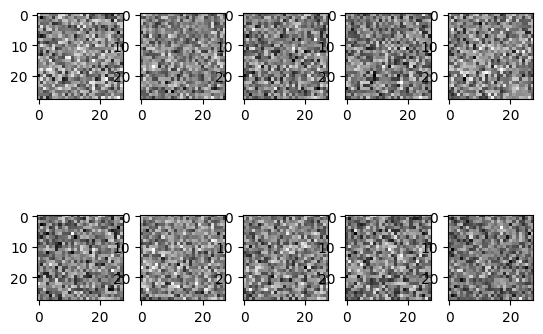

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━

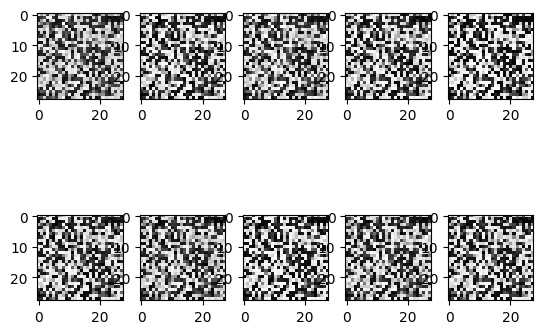

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

In [ ]:
# Training the GAN
epochs = 10000
batch_size = 64
half_batch = batch_size // 2

for epoch in range(epochs):
    # Real images
    idx = np.random.randint(0, X_train.shape[0], half_batch)
    real_images = X_train[idx]
    real_labels = np.ones((half_batch, 1))

    # Fake images
    noise = np.random.normal(0, 1, (half_batch, 100))
    fake_images = generator.predict(noise)
    fake_labels = np.zeros((half_batch, 1))

    # Train the discriminator
    d_loss_real = discriminator.train_on_batch(real_images, real_labels)
    d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)

    # Train the generator
    noise = np.random.normal(0, 1, (batch_size, 100))
    gan_labels = np.ones((batch_size, 1))
    g_loss = gan.train_on_batch(noise, gan_labels)

    # Print losses every 1000 epochs and visualize generated images
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Discriminator Loss: {d_loss_real[0]}, Generator Loss: {g_loss}")
        # Generate and display images
        generated_images = generator.predict(np.random.normal(0, 1, (10, 100)))
        for i in range(10):
            plt.subplot(2, 5, i+1)
            plt.imshow(generated_images[i].reshape(28, 28), cmap='gray')
        plt.show()

Step 4: Evaluate the GAN
The discriminator accuracy was used to measure how well the discriminator distinguishes between real and fake images. The quality of the generated images was visually inspected after every 1,000 epochs to track the GAN’s progress.

Expected outcome
Discriminator accuracy: In the early stages, the discriminator accuracy should be high, as the discriminator easily distinguishes real from fake images. As the generator improves, this accuracy level may decrease as the generated images become more realistic.

Visual quality: The generated images should start off as noise but gradually resemble MNIST digits as training progresses. By the 10,000th epoch, the images should be visually recognizable as handwritten digits.

Summary of results
After completing the activity, you should have:

Autoencoder: Achieved a low MSE score for the reconstruction of MNIST images, demonstrating its ability to compress and reconstruct data.

GAN: Generated realistic images over time while observing the evolution of the discriminator accuracy and the improvement in image quality.

Both models play a crucial role in generative AI, with autoencoders excelling in reconstruction tasks and GANs shining in generating new, realistic data.

Conclusion
This walkthrough provided you with practical insights into the evaluation of autoencoders and GANs within the realm of generative AI. You learned how to implement, train, and assess the performance of these models using quantitative metrics and qualitative observations. By understanding the strengths and weaknesses of each approach, you are better equipped to apply these techniques in real-world applications, paving the way for advancements in AI and ML.

